# Veri Hazırlama

Kütüphaneler

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io
import time

import warnings

warnings.filterwarnings("ignore")


In [2]:
torch.cuda.is_available()

True

Veri

In [3]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [4]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [5]:
dataset


Veri Ön İşleme

In [6]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [7]:
train_set


In [8]:
test_set


Veri Görselleştirme

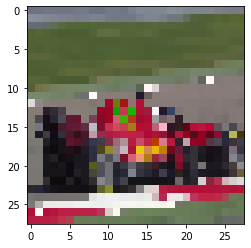

Ferrari
torch.Size([1, 3, 28, 28])


In [9]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [11]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.4294]
Epoch [1/2, loss:1.4388]
Epoch [1/3, loss:1.3600]
Epoch [1/4, loss:1.3814]
Epoch [1/5, loss:1.3164]
Epoch [1/6, loss:1.4056]
Epoch [1/7, loss:1.3796]
Epoch [1/8, loss:1.3929]
Epoch [1/9, loss:1.5419]
Epoch [1/10, loss:1.3711]
Epoch [1/11, loss:1.3631]
Epoch [1/12, loss:1.3821]
Epoch [1/13, loss:1.2744]
Epoch [1/14, loss:1.3487]
Epoch [1/15, loss:1.3330]
Epoch [1/16, loss:1.3728]
Epoch [1/17, loss:1.3117]
Epoch [1/18, loss:1.6123]
Epoch [1/19, loss:1.3764]
Epoch [1/20, loss:1.3048]
Epoch [1/21, loss:1.3711]
Epoch [1/22, loss:1.5932]
Epoch [1/23, loss:1.5855]
Epoch [1/24, loss:1.3281]
Epoch [1/25, loss:1.3208]
Epoch [1/26, loss:1.6070]
Epoch [1/27, loss:1.6103]
Epoch [1/28, loss:1.3581]
Epoch [1/29, loss:1.3082]
Epoch [1/30, loss:1.5673]
Epoch [1/31, loss:1.3561]
Epoch [1/32, loss:1.3367]
Epoch [1/33, loss:1.3304]
Epoch [1/34, loss:1.5310]
Epoch [1/35, loss:1.5399]
Epoch [1/36, loss:1.3622]
Epoch [1/37, loss:1.3507]
Epoch [1/38, loss:1.4850]
Epoch [1/39, loss:1.3

Modelin Testi

In [12]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [13]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 166 / 200 with accuracy 83.00
test doğruluk:
Got 54 / 79 with accuracy 68.35


Modelin Eğitim ve Testi

In [14]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []
acc_list = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)
            acc_list.append(dogruluk)
        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.2668 Accuracy: 36.7089 Error: 63.2911
iteration:  200 Loss: 1.3118 Accuracy: 29.1139 Error: 70.8861
iteration:  300 Loss: 0.8394 Accuracy: 49.3671 Error: 50.6329
iteration:  400 Loss: 0.9669 Accuracy: 54.4304 Error: 45.5696
iteration:  500 Loss: 0.2547 Accuracy: 64.5570 Error: 35.4430
iteration:  600 Loss: 0.7245 Accuracy: 62.0253 Error: 37.9747
iteration:  700 Loss: 0.1683 Accuracy: 70.8861 Error: 29.1139
iteration:  800 Loss: 0.8417 Accuracy: 75.9494 Error: 24.0506
iteration:  900 Loss: 0.0524 Accuracy: 75.9494 Error: 24.0506
iteration: 1000 Loss: 2.9082 Accuracy: 69.6203 Error: 30.3797
iteration: 1100 Loss: 0.0159 Accuracy: 73.4177 Error: 26.5823
iteration: 1200 Loss: 1.6401 Accuracy: 69.6203 Error: 30.3797
iteration: 1300 Loss: 0.0267 Accuracy: 73.4177 Error: 26.5823
iteration: 1400 Loss: 0.0018 Accuracy: 73.4177 Error: 26.5823
iteration: 1500 Loss: 0.0189 Accuracy: 77.2152 Error: 22.7848
iteration: 1600 Loss: 0.0099 Accuracy: 75.9494 Error: 24.0506
iteratio

In [15]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []
acc_list = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)
            acc_list.append(dogruluk)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.3491 Accuracy: 34.1772 Error: 65.8228
iteration:  200 Loss: 1.4359 Accuracy: 20.2532 Error: 79.7468
iteration:  300 Loss: 1.1452 Accuracy: 45.5696 Error: 54.4304
iteration:  400 Loss: 1.3930 Accuracy: 51.8987 Error: 48.1013
iteration:  500 Loss: 0.7840 Accuracy: 55.6962 Error: 44.3038
iteration:  600 Loss: 1.5672 Accuracy: 56.9620 Error: 43.0380
iteration:  700 Loss: 0.6845 Accuracy: 56.9620 Error: 43.0380
iteration:  800 Loss: 1.8045 Accuracy: 55.6962 Error: 44.3038
iteration:  900 Loss: 0.4728 Accuracy: 58.2278 Error: 41.7722
iteration: 1000 Loss: 1.8332 Accuracy: 59.4937 Error: 40.5063
iteration: 1100 Loss: 0.2619 Accuracy: 59.4937 Error: 40.5063
iteration: 1200 Loss: 1.5585 Accuracy: 62.0253 Error: 37.9747
iteration: 1300 Loss: 0.1734 Accuracy: 58.2278 Error: 41.7722
iteration: 1400 Loss: 1.0170 Accuracy: 60.7595 Error: 39.2405
iteration: 1500 Loss: 0.1349 Accuracy: 58.2278 Error: 41.7722
iteration: 1600 Loss: 0.6874 Accuracy: 65.8228 Error: 34.1772
iteratio

Model Save

In [16]:
torch.save(model,"../Model_Save/modelsave.pth") # modelin tamamı kayıt edildi
torch.save(model.state_dict(),"../Model_Save/modelstatedict.pth") # modelin ağırlıkları kayıt edildi

Model Load

In [17]:
model_save = torch.load("../Model_Save/modelsave.pth")

In [18]:
model_save

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fullyconnect1): Linear(in_features=32, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=50, bias=True)
  (fullyconnect3): Linear(in_features=50, out_features=100, bias=True)
  (fullyconnect4): Linear(in_features=100, out_features=4, bias=True)
)

In [19]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [20]:
print("train doğruluk:")
dogruluk(train_loader, model_save)

print("test doğruluk:")
dogruluk(test_loader, model_save)

train doğruluk:
Got 169 / 200 with accuracy 84.50
test doğruluk:
Got 51 / 79 with accuracy 64.56


##### Model ağırlıkları

In [21]:
model_agirlik = Net()
model_agirlik.load_state_dict(torch.load("../Model_Save/modelstatedict.pth"))

<All keys matched successfully>

In [22]:
model_agirlik

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fullyconnect1): Linear(in_features=32, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=50, bias=True)
  (fullyconnect3): Linear(in_features=50, out_features=100, bias=True)
  (fullyconnect4): Linear(in_features=100, out_features=4, bias=True)
)

In [23]:
print("train doğruluk:")
dogruluk(train_loader, model_agirlik)

print("test doğruluk:")
dogruluk(test_loader, model_agirlik)

train doğruluk:
Got 169 / 200 with accuracy 84.50
test doğruluk:
Got 51 / 79 with accuracy 64.56


Özet

In [24]:
from torchsummary import summary
summary(model, input_size=(3,28,28))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

Loss Görselleştirme

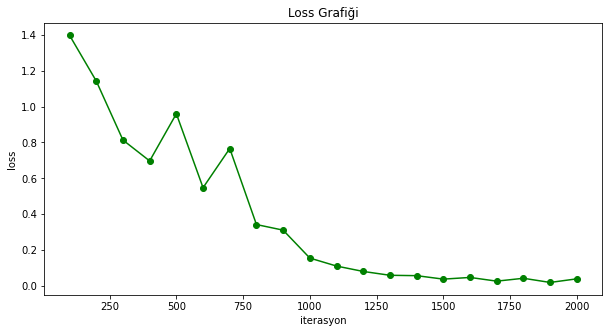

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Loss Grafiği")
plt.plot(iterasyon, kayip, "-o",color="g")

plt.xlabel("iterasyon")
plt.ylabel("loss")
plt.show()

Accuracy Görselleştirme

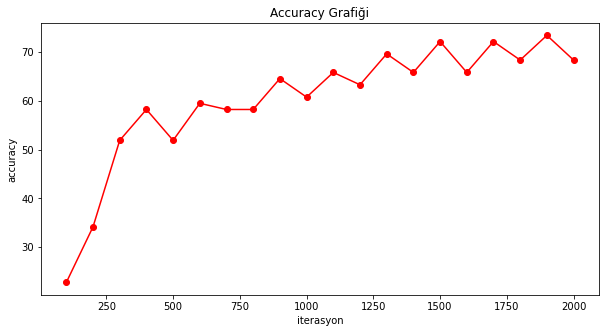

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Grafiği")

plt.plot(iterasyon, acc_list, "-o", color= "r")

plt.xlabel("iterasyon")
plt.ylabel("accuracy")
plt.show()

Test verisi ile tahmin

In [ ]:
class_name = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]

In [ ]:
def visualization(model, image_numbers=6):
    was_training = model.training
    model.eval()
    resim_sayisi = 0

    with torch.no_grad():
        for i , (image, labels) in enumerate(test_loader):

            output = model(image)
            _, tahmin = torch.max(output,1)

            for j in range(image.size()[0]):
                plt.figure(figsize=(40,30))
                resim_sayisi += 1

                ax = plt.subplot(image_numbers //  2,2, resim_sayisi )
                ax.axis("off")
                ax.set_title("Tahmin : {}".format(class_name[tahmin[j]]))

                imshow(image.cpu().data[j])

                if resim_sayisi == image_numbers:
                    model.train(mode = was_training)
                    return
                 

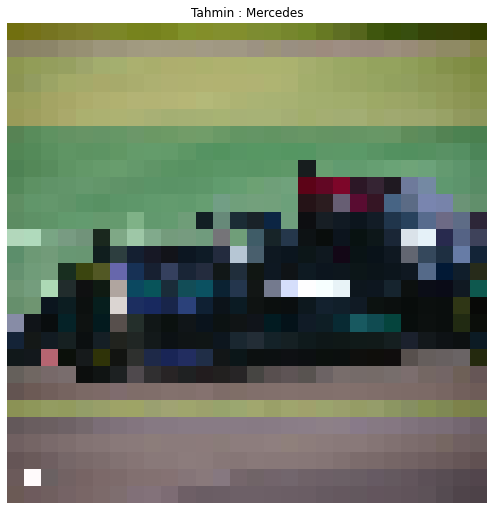

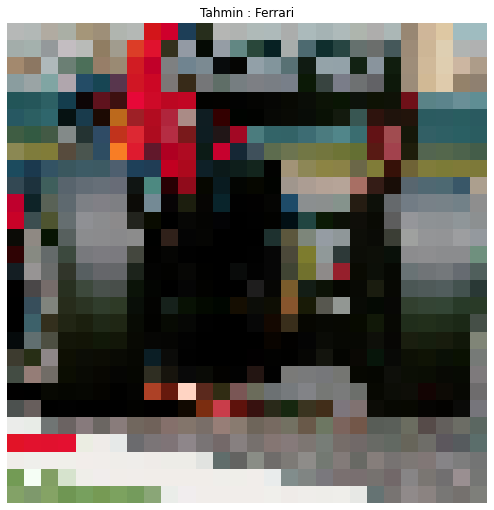

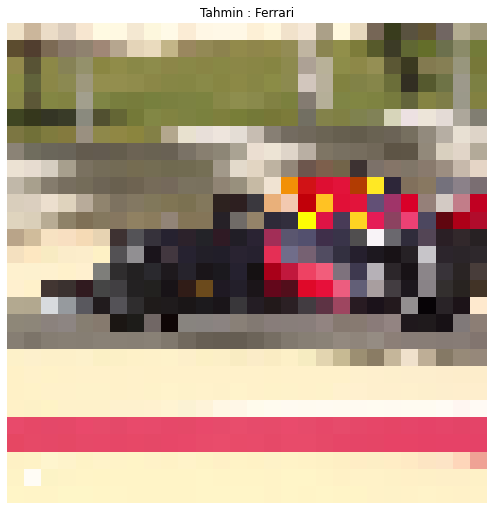

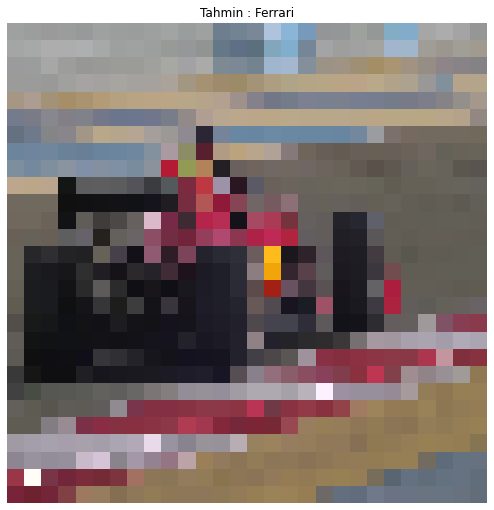

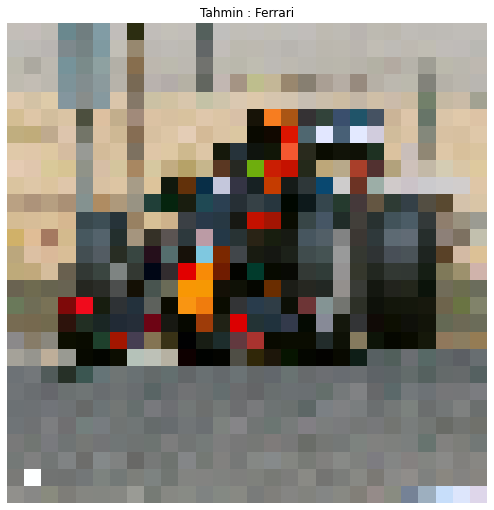

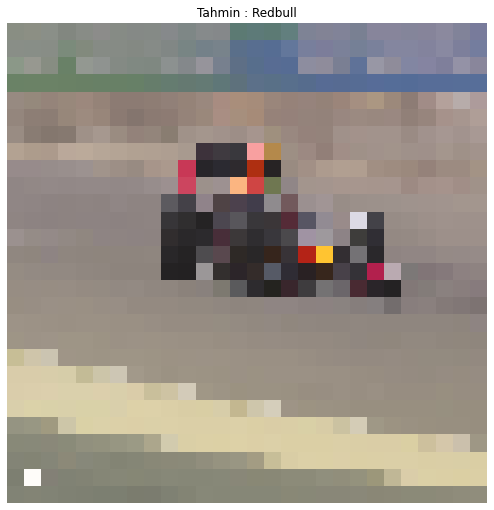

In [ ]:
visualization(model)

Sequential Model

In [ ]:
model = nn.Sequential(
    
    nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    
    nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    
    nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2,2)),
    nn.ReLU(),

    nn.Flatten(),
    
    nn.Linear(in_features=32, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=4)
    
)

In [ ]:
model

Sequential(
  (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (10): ReLU()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=32, out_features=50, bias=True)
  (13): ReLU()
  (14): Linear(in_features=50, out_features=50, bias=True)
  (15): ReLU()
  (16): Linear(in_features=50, out_features=100, bias=True)
  (17): ReLU()
  (18): Linear(in_features=100, out_features=4, bias=True)
)

Modelin Eğitimi

In [ ]:
start = time.time()

optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate (train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out,label)
        loss.backward()
        optimizer.step()

        print("Epoch [{:4}  /{:4}], loss:{:4.4f}".format(i+1,j+1, loss.item()))
    
end = time.time()
print("Süre", end-start)

Epoch [   1  /   1], loss:1.4154
Epoch [   1  /   2], loss:1.3752
Epoch [   1  /   3], loss:1.3978
Epoch [   1  /   4], loss:1.3640
Epoch [   1  /   5], loss:1.3618
Epoch [   1  /   6], loss:1.4440
Epoch [   1  /   7], loss:1.3672
Epoch [   1  /   8], loss:1.4466
Epoch [   1  /   9], loss:1.3544
Epoch [   1  /  10], loss:1.3657
Epoch [   1  /  11], loss:1.3895
Epoch [   1  /  12], loss:1.4442
Epoch [   1  /  13], loss:1.3636
Epoch [   1  /  14], loss:1.3528
Epoch [   1  /  15], loss:1.3609
Epoch [   1  /  16], loss:1.3584
Epoch [   1  /  17], loss:1.3546
Epoch [   1  /  18], loss:1.3529
Epoch [   1  /  19], loss:1.4499
Epoch [   1  /  20], loss:1.3417
Epoch [   1  /  21], loss:1.3520
Epoch [   1  /  22], loss:1.3508
Epoch [   1  /  23], loss:1.3482
Epoch [   1  /  24], loss:1.4198
Epoch [   1  /  25], loss:1.4210
Epoch [   1  /  26], loss:1.3399
Epoch [   1  /  27], loss:1.3287
Epoch [   1  /  28], loss:1.4214
Epoch [   1  /  29], loss:1.4731
Epoch [   1  /  30], loss:1.3318
Epoch [   

Model Testi

In [ ]:
def dogruluk(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:

            out = model(x)
            _, pred = out.max(1)
            num_correct += (pred==y).sum()
            num_samples += pred.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()
        


In [ ]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 133 / 200 with accuracy 66.50
test doğruluk:
Got 53 / 79 with accuracy 67.09


Data Augmentation

In [ ]:
veri_arttirma = transforms.Compose([
    
    transforms.ToPILImage(),
    transforms.Resize((500, 500)),
    #transforms.CenterCrop()
    #transforms.RandomCrop((32,32)),
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.RandomVerticalFlip(p=0.5),
    #transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
    #transforms.GaussianBlur(kernel_size=1),
    #transforms.Grayscale(num_output_channels=3),
    #transforms.RandomPerspective(),
])

In [ ]:
dataset = veri(
    csv_file = "../../veriler/f1_classification/f111.csv",
    root_dir = "../../veriler/f1_classification",
    transform = veri_arttirma

)

In [ ]:
from torchvision.utils import save_image

foto_sayi = 0

for _ in range(1):
    
    for image, label in dataset:
        save_image(image, "../../veriler/Bolum_01_Data Augmentation/img" + str(foto_sayi)+ ".jpg")
        foto_sayi += 1

Modelin Eğitimi

In [ ]:
start = time.time()

model = Net()
print(torch.cuda.is_available())
print(torch.zeros(1).cuda())

device = torch.device("cuda:0")
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

error = torch.nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import StepLR
lr = StepLR(optimizer, step_size=1, gamma=0.5)

epoch = 3
count = 0
loss_list = []
iteration_list = []

for i in range(epoch):
   
    lr.step()
    print("Epoch:",i, "LR", lr.get_lr())

    for j, (images, label) in enumerate (train_loader):
        images = images.to(device)
        label =  label.to(device)

        out=model(images.float())
        optimizer.zero_grad()

        loss = error(out, label)
        loss.backward()

        optimizer.step()
        count += 1

        if count % 50 == 0:
            total = 0
            correct = 0
            correct_hata = 0
            for images, label in test_loader:
                images = images.to(device)
                label = label.to(device)

                out= model(images.float())
                y_pred = torch.max(out.data, 1)[1]
                total +=  len(label)

                correct += (y_pred==label).sum()
                correct_hata += (y_pred != label).sum()

            accuray = 100 * correct / float(total)
            hata = 100 * correct_hata / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)

        if count % 50 == 0:
            print("Iteration: {:4} Loss: {:4.4f} Accuracy: {:4.4f}% Error: {:4.4f}%".format(count, loss.data, accuray, hata))
end = time.time()
print("Süre", end-start)

True
tensor([0.], device='cuda:0')
Epoch: 0 LR [0.00025]
Iteration:   50 Loss: 1.5006 Accuracy: 24.0506% Error: 75.9494%
Iteration:  100 Loss: 1.3230 Accuracy: 18.9873% Error: 81.0127%
Iteration:  150 Loss: 1.3838 Accuracy: 18.9873% Error: 81.0127%
Iteration:  200 Loss: 1.4957 Accuracy: 34.1772% Error: 65.8228%
Epoch: 1 LR [0.000125]
Iteration:  250 Loss: 1.4631 Accuracy: 41.7722% Error: 58.2278%
Iteration:  300 Loss: 0.9355 Accuracy: 41.7722% Error: 58.2278%
Iteration:  350 Loss: 0.6856 Accuracy: 43.0380% Error: 56.9620%
Iteration:  400 Loss: 1.1774 Accuracy: 45.5696% Error: 54.4304%
Epoch: 2 LR [6.25e-05]
Iteration:  450 Loss: 1.4382 Accuracy: 45.5696% Error: 54.4304%
Iteration:  500 Loss: 0.4865 Accuracy: 49.3671% Error: 50.6329%
Iteration:  550 Loss: 0.7011 Accuracy: 49.3671% Error: 50.6329%
Iteration:  600 Loss: 0.9806 Accuracy: 48.1013% Error: 51.8987%
Süre 68.18818783760071


Learning Rate Azaltma

- Modelin eğitimi

In [27]:
start = time.time()

model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import StepLR
lr = StepLR(optimizer, step_size=2, gamma=0.7)

epoch = 10
kayip=[]
count = 0
iterasyon=[]

for i in range(epoch):
    lr.step()

    print("Epoch:",i, "LR:", lr.get_lr())

    for i, (images, label) in enumerate(train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)
        loss.backward()
        optimizer.step()
        count += 1

        if count %100 ==0:
            total = 0
            correct = 0
            correct_hata = 0
            for images, label in test_loader:
                
                out= model(images)
                y_pred = torch.max(out.data, 1)[1]
                total +=  len(label)

                correct += (y_pred==label).sum()
                correct_hata += (y_pred != label).sum()
            dogruluk = 100* correct / float(total)
            hata = 100 * correct_hata / float(total)

            kayip.append(loss.data)
            iterasyon.append(count)
        if count % 100 == 0:
            print("Iteration: {:4} Loss: {:4.4f} Accuracy: {:4.4f}% Error: {:4.4f}%".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre", end-start)




Epoch: 0 LR: [0.001]
Iteration:  100 Loss: 1.2058 Accuracy: 41.7722% Error: 58.2278%
Iteration:  200 Loss: 0.8727 Accuracy: 48.1013% Error: 51.8987%
Epoch: 1 LR: [0.00049]
Iteration:  300 Loss: 0.8653 Accuracy: 58.2278% Error: 41.7722%
Iteration:  400 Loss: 1.3610 Accuracy: 44.3038% Error: 55.6962%
Epoch: 2 LR: [0.0007]
Iteration:  500 Loss: 1.0210 Accuracy: 58.2278% Error: 41.7722%
Iteration:  600 Loss: 1.1989 Accuracy: 43.0380% Error: 56.9620%
Epoch: 3 LR: [0.000343]
Iteration:  700 Loss: 0.9626 Accuracy: 60.7595% Error: 39.2405%
Iteration:  800 Loss: 0.7934 Accuracy: 55.6962% Error: 44.3038%
Epoch: 4 LR: [0.00049]
Iteration:  900 Loss: 0.6661 Accuracy: 68.3544% Error: 31.6456%
Iteration: 1000 Loss: 0.2264 Accuracy: 62.0253% Error: 37.9747%
Epoch: 5 LR: [0.00024009999999999998]
Iteration: 1100 Loss: 0.3399 Accuracy: 68.3544% Error: 31.6456%
Iteration: 1200 Loss: 0.3031 Accuracy: 63.2911% Error: 36.7089%
Epoch: 6 LR: [0.000343]
Iteration: 1300 Loss: 0.2070 Accuracy: 70.8861% Error: 29